In [1]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
import torch
from PIL import Image
     

C:\Users\student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds
  
# predict_step(['./3747543364_bf5b548527.jpg']) 
     

config.json: 100%|██████████| 4.61k/4.61k [00:00<?, ?B/s]
C:\Users\student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\student\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(

In [6]:
print(model)


VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur

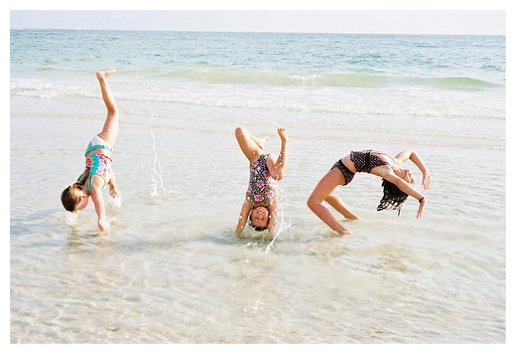

Predicted caption: two girls playing in the water on a beach


In [8]:
import matplotlib.pyplot as plt

image_path = './3747543364_bf5b548527.jpg' 
sample_prediction = predict_step([image_path])

image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

print(f"Predicted caption: {sample_prediction[0]}")


In [11]:
predict_step(['./3747543364_bf5b548527.jpg']) 

['two girls playing in the water on a beach']

In [12]:
# Experiment with different beam sizes
beam_sizes = [2, 4, 6, 8]
for beam_size in beam_sizes:
    gen_kwargs["num_beams"] = beam_size
    
    predictions = predict_step(['./sample2.jpg'])  # Replace with your image path
    print(f"Predictions with beam size {beam_size}: {predictions}")


Predictions with beam size 2: ['a man riding a horse on top of a beach']
Predictions with beam size 4: ['a man riding a horse on top of a beach']
Predictions with beam size 6: ['a man riding a horse on top of a beach']
Predictions with beam size 8: ['a man riding a horse on top of a beach']


In [13]:
# Display basic information about the loaded model
print(model.config)


VisionEncoderDecoderConfig {
  "_name_or_path": "nlpconnect/vit-gpt2-image-captioning",
  "architectures": [
    "VisionEncoderDecoderModel"
  ],
  "bos_token_id": 50256,
  "decoder": {
    "_name_or_path": "",
    "activation_function": "gelu_new",
    "add_cross_attention": true,
    "architectures": [
      "GPT2LMHeadModel"
    ],
    "attn_pdrop": 0.1,
    "bad_words_ids": null,
    "begin_suppress_tokens": null,
    "bos_token_id": 50256,
    "chunk_size_feed_forward": 0,
    "cross_attention_hidden_size": null,
    "decoder_start_token_id": 50256,
    "diversity_penalty": 0.0,
    "do_sample": false,
    "early_stopping": false,
    "embd_pdrop": 0.1,
    "encoder_no_repeat_ngram_size": 0,
    "eos_token_id": 50256,
    "exponential_decay_length_penalty": null,
    "finetuning_task": null,
    "forced_bos_token_id": null,
    "forced_eos_token_id": null,
    "id2label": {
      "0": "LABEL_0",
      "1": "LABEL_1"
    },
    "initializer_range": 0.02,
    "is_decoder": true,
   

In [14]:
# Predict captions for multiple images and display the results
image_paths = ['./img1.jpg', './img2.jpg', './img3.jpg']  # Replace with your image paths
predictions = predict_step(image_paths)

for idx, image_path in enumerate(image_paths):
    print(f"Image: {image_path}")
    print(f"Predicted Caption: {predictions[idx]}")
    print("=" * 50)


Image: ./img1.jpg
Predicted Caption: a man and woman standing in front of a table full of food
Image: ./img2.jpg
Predicted Caption: a person sitting on a bench next to a body of water
Image: ./img3.jpg
Predicted Caption: a dog running in the grass with a frisbee in its mouth


In [15]:
import time

# Measure model inference time for a single image
start_time = time.time()
image_path = './img2.jpg'  # Replace with your image path
_ = predict_step([image_path])
inference_time = time.time() - start_time
print(f"Inference Time for Single Image: {inference_time} seconds")


Inference Time for Single Image: 12.298733234405518 seconds


In [16]:
# Display detailed configuration information of the loaded model
print(model.config.to_dict())


{'return_dict': True, 'output_hidden_states': False, 'output_attentions': False, 'torchscript': False, 'torch_dtype': 'float32', 'use_bfloat16': False, 'tf_legacy_loss': False, 'pruned_heads': {}, 'tie_word_embeddings': False, 'is_encoder_decoder': True, 'is_decoder': False, 'cross_attention_hidden_size': None, 'add_cross_attention': False, 'tie_encoder_decoder': False, 'max_length': 20, 'min_length': 0, 'do_sample': False, 'early_stopping': False, 'num_beams': 1, 'num_beam_groups': 1, 'diversity_penalty': 0.0, 'temperature': 1.0, 'top_k': 50, 'top_p': 1.0, 'typical_p': 1.0, 'repetition_penalty': 1.0, 'length_penalty': 1.0, 'no_repeat_ngram_size': 0, 'encoder_no_repeat_ngram_size': 0, 'bad_words_ids': None, 'num_return_sequences': 1, 'chunk_size_feed_forward': 0, 'output_scores': False, 'return_dict_in_generate': False, 'forced_bos_token_id': None, 'forced_eos_token_id': None, 'remove_invalid_values': False, 'exponential_decay_length_penalty': None, 'suppress_tokens': None, 'begin_supp

In [ ]:
# Apply image preprocessing before passing them to the model
from torchvision import transforms

# Define image transformations
image_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Process image using defined transformations
image = Image.open('image_path.jpg')  # Replace with your image path
image = image_transforms(image)
